In [ ]:
# check environment
import os
print("Conda env:", os.environ['CONDA_DEFAULT_ENV'])
assert os.environ['CONDA_DEFAULT_ENV'] == 'geoprogv1'
# spatial libraries 
import fiona as fi
import geopandas
import pandas as pd
import pysal as sal

print('env ok')

In [3]:
# Define the folder path containing the CSV files
folder_path = r"C:\Users\Fra\Desktop\PolygonSizes"
files = os.listdir(folder_path)

# Initialize an empty list to store the results
results = []

# For each file in the folder check whether it's a CSV and read it into a DataFrame
for file_name in files:
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        # Calculate the sum, count, and percentage for patches with area < 10 hectares
        sum_lt_10 = df.loc[df['area_ha'] < 10, 'area_ha'].sum()
        count_lt_10 = df.loc[df['area_ha'] < 10, 'area_ha'].count()
        pct_lt_10 = sum_lt_10 / df['area_ha'].sum() * 100
        
        # Calculate the sum, count, and percentage for patches with area between 10 and 100 hectares
        sum_10_to_100 = df.loc[(df['area_ha'] >= 10) & (df['area_ha'] < 100), 'area_ha'].sum()
        count_10_to_100 = df.loc[(df['area_ha'] >= 10) & (df['area_ha']  < 100), 'area_ha'].count()
        pct_10_to_100 = sum_10_to_100 / df['area_ha'].sum() * 100
        
        # Calculate the sum, count, and percentage for patches with area >= 100 hectares
        sum_gt_100 = df.loc[df['area_ha'] >= 100, 'area_ha'].sum()
        count_gt_100 = df.loc[df['area_ha'] >= 100, 'area_ha'].count()
        pct_gt_100 = sum_gt_100 / df['area_ha'].sum() * 100
        
        # Append the results to the list
        results.append({
            "File Name": file_name.split("_")[0]+'_'+file_name.split("_")[-1].split('.')[0],
            "< 10 Sum": round(sum_lt_10, 2),
            "< 10 Count": count_lt_10,
            "% of <10": round(pct_lt_10, 2),
            "10-100 Sum": sum_10_to_100,
            "10-100 Count": count_10_to_100,
            "% of 10-100": round(pct_10_to_100, 2),
            "> 100 Sum": round(sum_gt_100, 2),
            "> 100 Count": count_gt_100,
            "% of >100": round(pct_gt_100, 2),
        })
# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Export the DataFrame as CSV
results_df.to_csv('results_all_regions.csv', index=False)
results_df

,File Name,< 10 Sum,< 10 Count,% of <10,10-100 Sum,10-100 Count,% of 10-100,> 100 Sum,> 100 Count,% of >100
0,Centre_2017,65328.17,103354,95.02,3426.648500,211,4.98,0.00,0,0.00
1,Centre_2018,39866.19,75161,94.86,1923.915371,118,4.58,238.25,1,0.57
2,Centre_2019,41176.21,77398,96.06,1485.938340,87,3.47,202.94,1,0.47
3,Centre_2020,75974.02,121547,94.64,4303.748317,257,5.36,0.00,0,0.00
4,Centre_2021,51118.37,90225,92.27,4072.154151,221,7.35,207.67,2,0.37
5,Est_2017,39246.81,55668,81.06,7220.979142,336,14.91,1947.77,9,4.02
6,Est_2018,19481.62,38040,97.54,491.291337,26,2.46,0.00,0,0.00
7,Est_2019,31015.01,47490,95.62,1419.673749,90,4.38,0.00,0,0.00
8,Est_2020,52359.01,76330,92.19,4433.265227,261,7.81,0.00,0,0.00
9,Est_2021,41978.97,59470,89.82,4288.012055,265,9.17,469.49,2,1.00


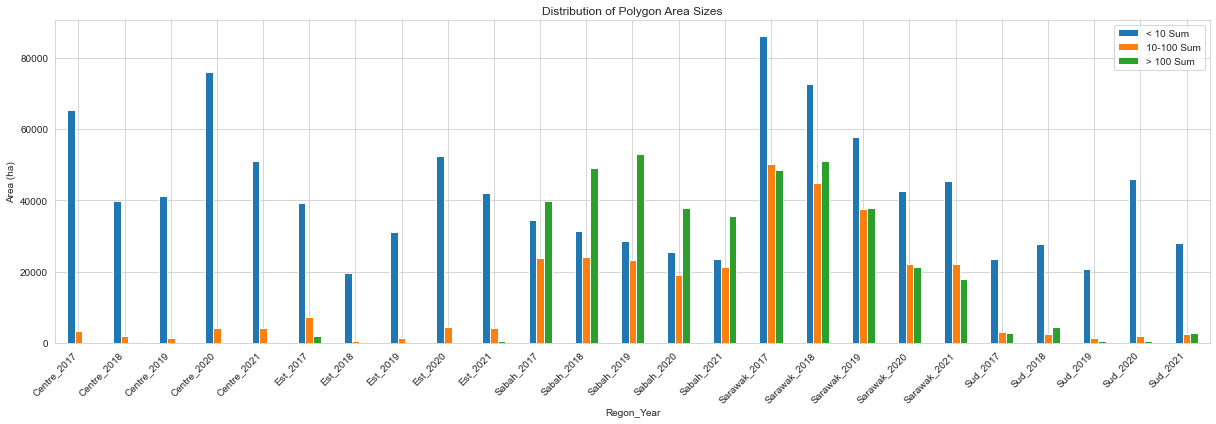

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set font to Noto Sans
plt.rcParams['font.family'] = 'Noto Sans'

# Select only the sum columns
sum_cols = [col for col in results_df.columns if 'Sum' in col]
sum_df = results_df[['File Name'] + sum_cols]

# Create bar plot
sns.set_style("whitegrid")
ax = sum_df.plot(kind='bar', x='File Name', stacked=False, figsize=(17,6))

# Set axis labels and title
ax.set_xlabel('Regon_Year')
ax.set_ylabel('Area (ha)')
ax.set_title('Distribution of Polygon Area Sizes')

# Set tick label rotation
plt.xticks(rotation=45, ha='right')

# Set decimal places of y-axis tick labels
plt.yticks(rotation=0)
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))

# Save and show plot
plt.tight_layout()
plt.savefig('polygon_areas_sum.png')
plt.show()

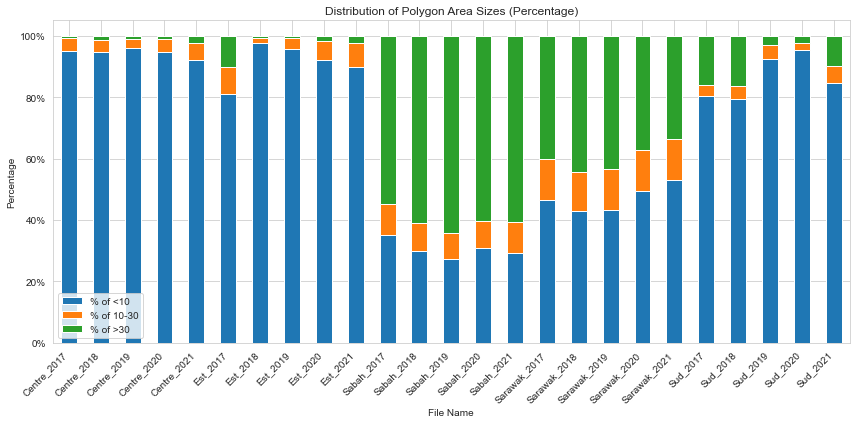

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set font to Noto Sans
plt.rcParams['font.family'] = 'Noto Sans'

# Select only the percentage columns
pct_cols = [col for col in results_df.columns if '%' in col]
pct_df = results_df[['File Name'] + pct_cols]

# Create bar plot
sns.set_style("whitegrid")
ax = pct_df.plot(kind='bar', x='File Name', stacked=True, figsize=(12,6))

# Set axis labels and title
ax.set_xlabel('File Name')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Polygon Area Sizes (Percentage)')

# Set tick label rotation
plt.xticks(rotation=45, ha='right')

# Set decimal places of y-axis tick labels
plt.yticks(rotation=0)
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f%%'))

# Save and show plot
plt.tight_layout()
plt.savefig('polygon_areas_pct.png')
plt.show()

In [6]:
# Create empty dataframe for largest plots
largest_plots = pd.DataFrame(columns=['Region_year', '1st Largest', '2nd Largest', '3rd Largest'])

# Loop through each file
for file_name in files:
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        # Sort dataframe by area_ha in descending order
        sorted_df = df.sort_values('area_ha', ascending=False)
        # Select the top 3 rows
        top3_df = sorted_df.iloc[:3, :]
        # Get the area_ha values and convert to string with 2 decimal places
        areas_str = top3_df['area_ha'].apply(lambda x: f'{x:.2f}')
        # Combine the areas as a string with commas
        areas_combined = ', '.join(areas_str)
        # Create a row for the largest plots dataframe
        row = {'Region_year': file_name.split("_")[0]+'_'+file_name.split("_")[-1].split('.')[0], 
               '1st Largest': areas_str.iloc[0], 
               '2nd Largest': areas_str.iloc[1], 
               '3rd Largest': areas_str.iloc[2]}
        # Add the row to the largest plots dataframe
        largest_plots = largest_plots.append(row, ignore_index=True)

largest_plots.to_csv("largest_plots.csv", index=False)
        
# Display the largest plots dataframe
largest_plots

,Region_year,1st Largest,2nd Largest,3rd Largest
0,Centre_2017,64.64,61.09,58.39
1,Centre_2018,238.25,56.92,39.86
2,Centre_2019,202.94,85.65,55.07
3,Centre_2020,93.42,64.00,56.43
4,Centre_2021,104.16,103.51,94.76
5,Est_2017,355.13,354.19,324.28
6,Est_2018,64.50,59.74,29.42
7,Est_2019,43.06,36.86,36.52
8,Est_2020,72.85,58.65,50.73
9,Est_2021,278.30,191.19,75.51


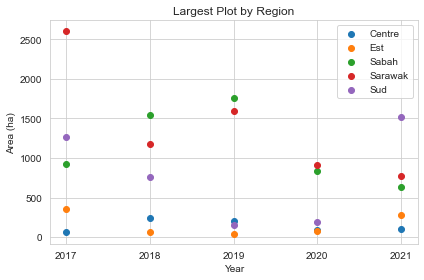

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Convert area values to numeric data type
largest_plots[['1st Largest', '2nd Largest', '3rd Largest']] = largest_plots[['1st Largest', '2nd Largest', '3rd Largest']].astype(float)

# Extract regions and years from Region_year column
largest_plots['Region'] = largest_plots['Region_year'].str.split('_').str[0]
largest_plots['Year'] = largest_plots['Region_year'].str.split('_').str[1]

# Assign numeric values to regions
regions = largest_plots['Region'].unique()
region_codes = np.arange(len(regions))
region_mapping = dict(zip(regions, region_codes))
colors = plt.cm.tab10(region_codes)  # Generate unique colors for each region

# Map region codes to the dataframe
largest_plots['Region_code'] = largest_plots['Region'].map(region_mapping)

# Create scatter plot
for region, color in zip(regions, colors):
    region_data = largest_plots[largest_plots['Region'] == region]
    plt.scatter(region_data['Year'], region_data['1st Largest'], color=color, label=region)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Area (ha)')
plt.title('Largest Plot by Region')
plt.legend()

# Show the plot
plt.tight_layout()
file_name = "Largest_Plots_by_Region.png"
plt.savefig(file_name, dpi=300)  # Adjust the DPI value as desired

plt.show()


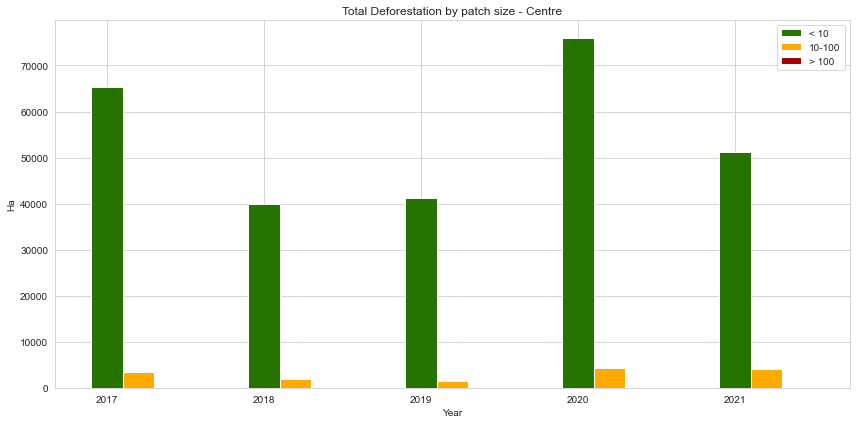

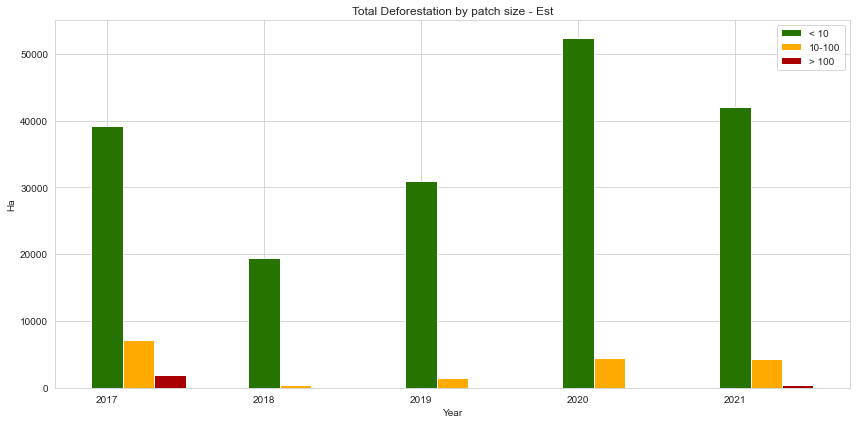

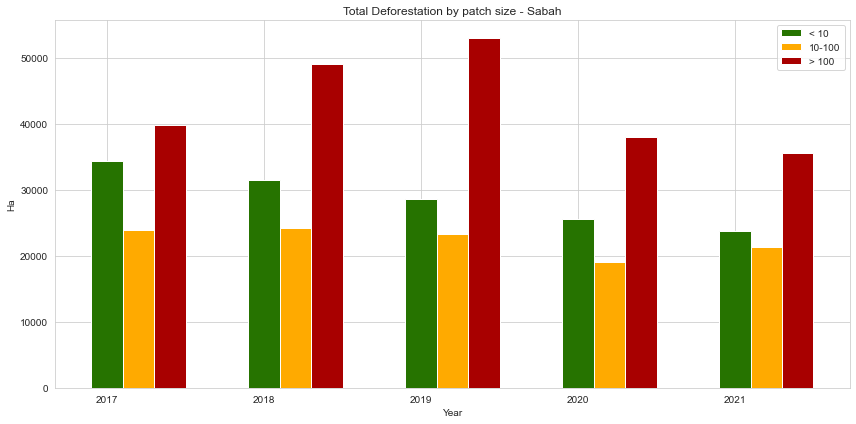

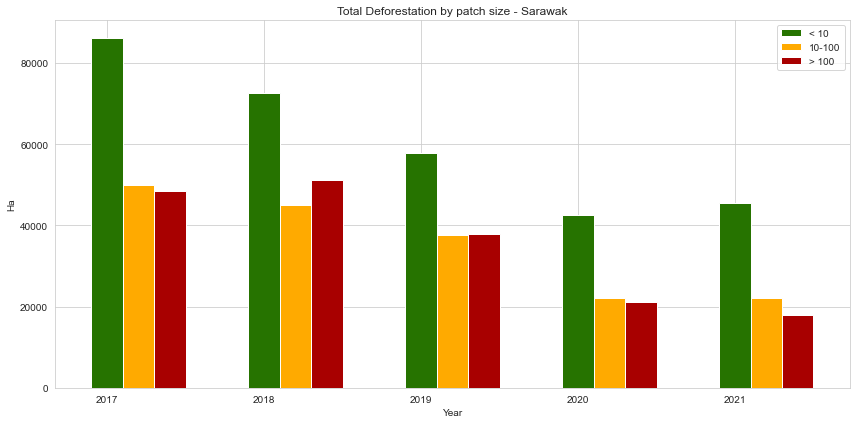

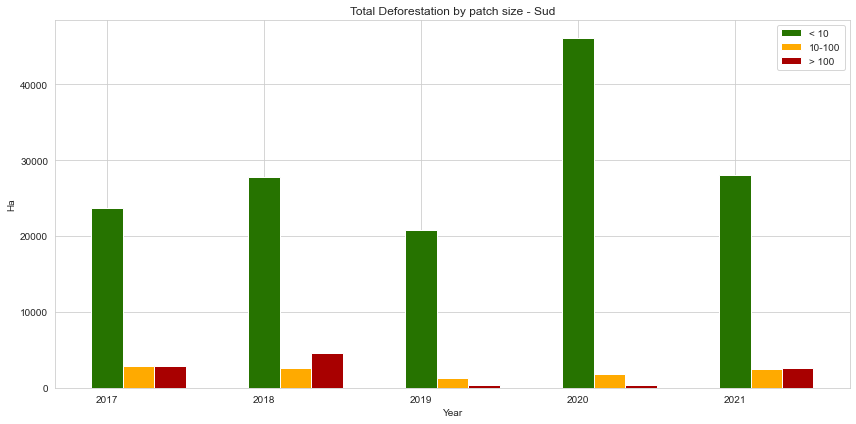

In [8]:
import re
import matplotlib.pyplot as plt

# Group the dataframe by region
grouped_df = results_df.groupby(results_df['File Name'].str.split('_').str[0])

# Define the colors for each class
colors = ['#267300', '#ffaa00', '#a80000']

# Iterate through each region
for region, region_df in grouped_df:
    # Extract the years and sums for each class
    years = [re.findall(r'\d+', entry)[0] for entry in region_df['File Name']]
    sum_lt_10 = region_df['< 10 Sum']
    sum_10_100 = region_df['10-100 Sum']
    sum_gt_100 = region_df['> 100 Sum']
    
    # Create a bar chart for the sums of each class for the region
    x = range(len(years))
    width = 0.2

    plt.figure(figsize=(12, 6))

    plt.bar(x, sum_lt_10, width, label='< 10', color=colors[0])
    plt.bar([i + width for i in x], sum_10_100, width, label='10-100', color=colors[1])
    plt.bar([i + 2 * width for i in x], sum_gt_100, width, label='> 100', color=colors[2])

    # Customize the chart appearance and labels
    plt.title(f"Total Deforestation by patch size - {region}")
    plt.xlabel("Year")
    plt.ylabel("Ha")
    plt.xticks(x, years)
    plt.legend()

    plt.tight_layout()
    
    # Save the chart
    file_name = f"{region}_deforestation_chart.png"
    plt.savefig(file_name, dpi=300)  # Adjust the DPI value as desired
    
    plt.show()



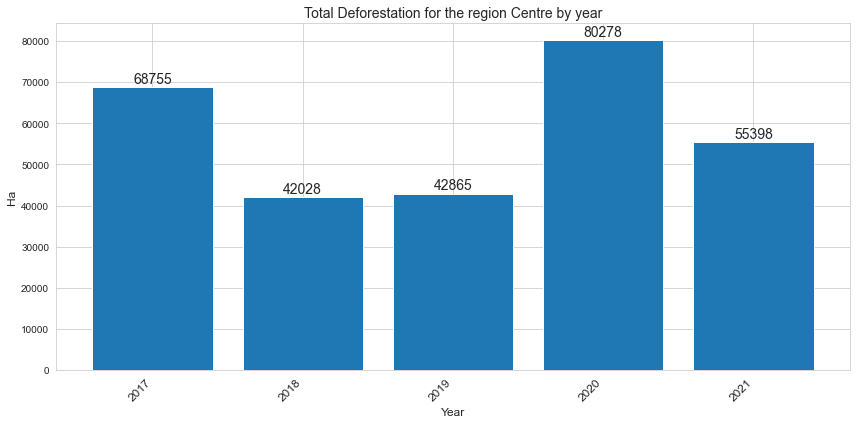

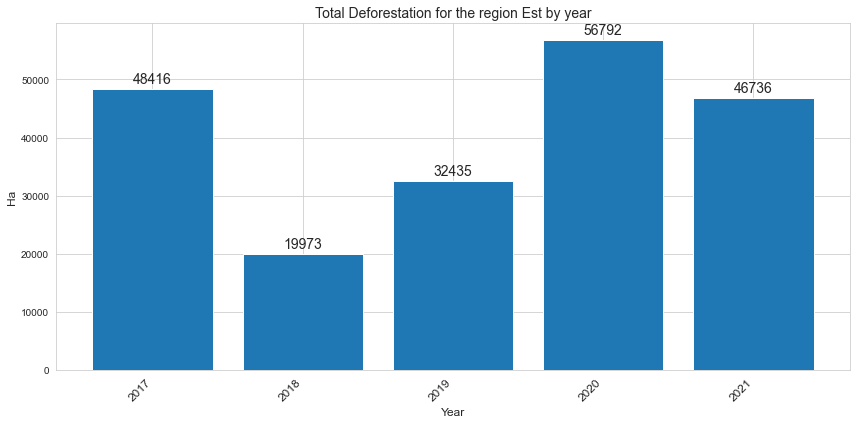

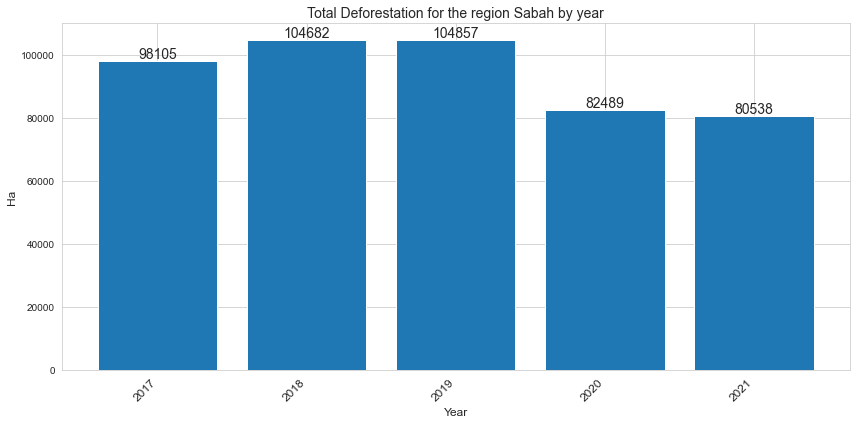

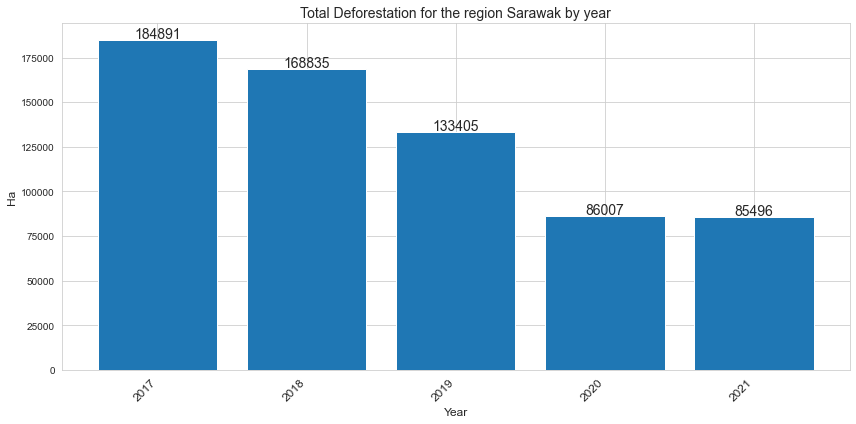

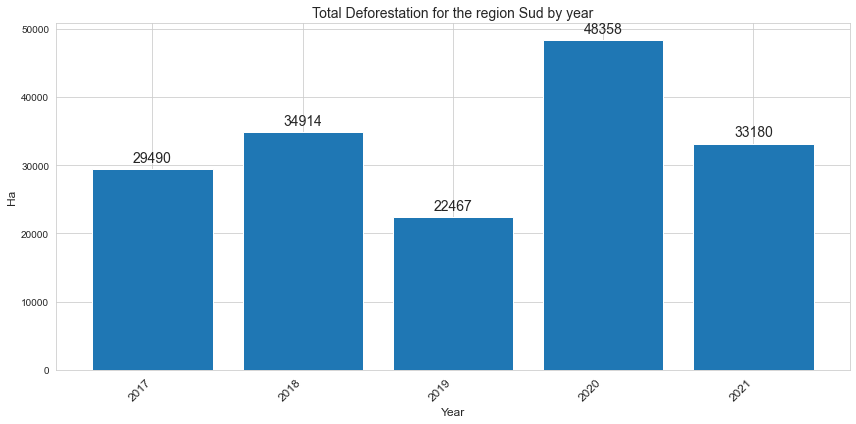

In [10]:
# Group the dataframe by region
grouped_df = results_df.groupby(results_df['File Name'].str.split('_').str[0])

# Iterate over each group
for region, group in grouped_df:
    # Sort the group by year
    sorted_group = group.sort_values('File Name')
    
    # Calculate the total sum of the three classes
    total_sum = sorted_group['< 10 Sum'] + sorted_group['10-100 Sum'] + sorted_group['> 100 Sum']
    
    # Extract the year from the 'File Name' column
    years = sorted_group['File Name'].str.split('_').str[1]
    
    # Set the figure size
    plt.figure(figsize=(12, 6))
    
    # Create the bar chart
    plt.bar(years, total_sum)
    
    # Set the labels and title
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Ha', fontsize=12)
    plt.title(f'Total Deforestation for the region {region} by year',fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust the font size
    
    # Add text annotation with the total number
    for i, v in enumerate(total_sum):
        plt.text(i, v + 1000, f"{v:.0f}", ha='center', fontsize=14)  # Adjust the position and font size
    
    # Show the plot
    plt.tight_layout()
    
      # Save the chart
    file_name = f"{region}_total_deforestation_chart.png"
    plt.savefig(file_name, dpi=300)  # Adjust the DPI value as desired
    
    plt.show()


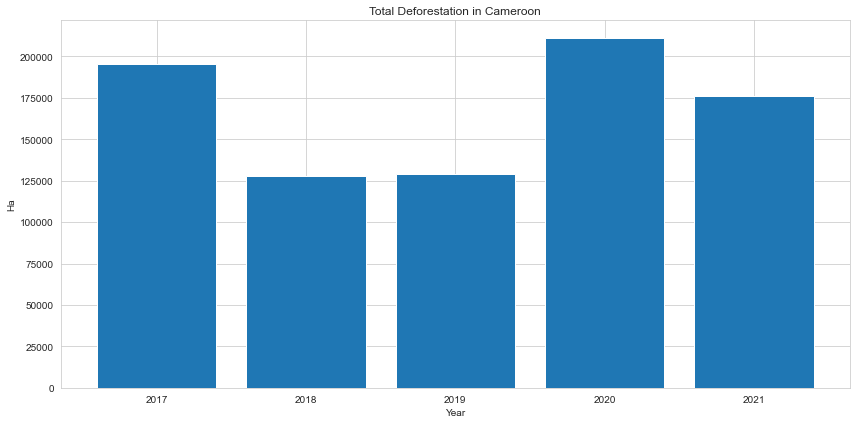

In [11]:
import matplotlib.pyplot as plt

years = [2017, 2018, 2019, 2020, 2021]
total_deforestation = [195613.58, 128057.93, 128985.84, 211156.91, 175958.69]

plt.figure(figsize=(12, 6))
plt.bar(years, total_deforestation)

# Customize the chart appearance and labels
plt.title("Total Deforestation in Cameroon")
plt.xlabel("Year")
plt.ylabel("Ha")
plt.xticks(years)
plt.tight_layout()

# Save the chart
plt.savefig("cameroon_total_deforestation.png", dpi=300)  # Adjust the file name and DPI value as desired

# Show the chart
plt.show()

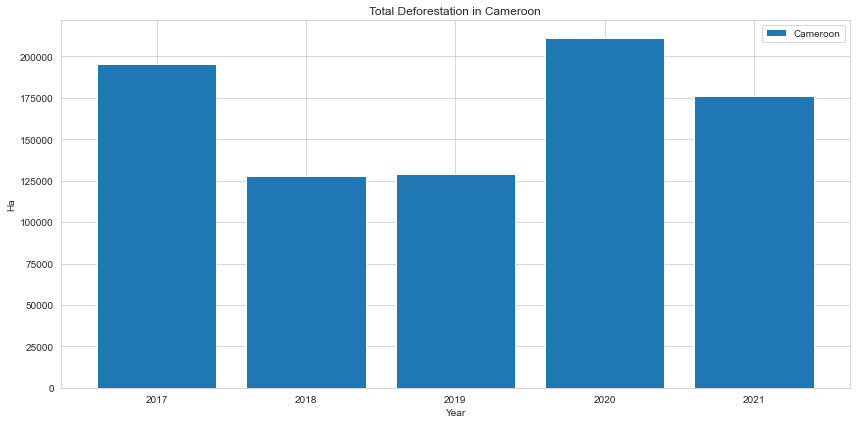

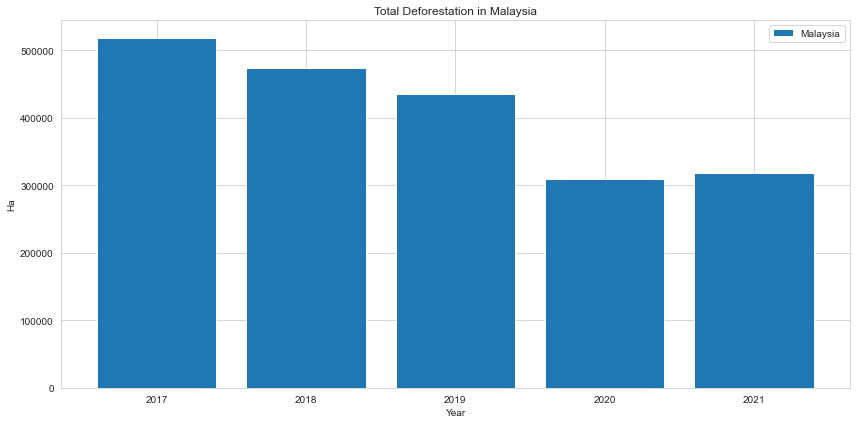

In [12]:
import matplotlib.pyplot as plt

# Data for Cameroon
cameroon_years = [2017, 2018, 2019, 2020, 2021]
cameroon_deforestation = [195613.58, 128057.93, 128985.84, 211156.91, 175958.69]

# Data for Malaysia
malaysia_years = [2017, 2018, 2019, 2020, 2021]
malaysia_deforestation = [518587.62, 473719.12, 435202.58, 309066.80, 319060.73]

# Create a bar chart for Cameroon
plt.figure(figsize=(12, 6))
plt.bar(cameroon_years, cameroon_deforestation, label="Cameroon")

# Customize the chart appearance and labels for Cameroon
plt.title("Total Deforestation in Cameroon")
plt.xlabel("Year")
plt.ylabel("Ha")
plt.xticks(cameroon_years)
plt.legend()
plt.tight_layout()
plt.show()

# Create a bar chart for Malaysia
plt.figure(figsize=(12, 6))
plt.bar(malaysia_years, malaysia_deforestation, label="Malaysia")

# Customize the chart appearance and labels for Malaysia
plt.title("Total Deforestation in Malaysia")
plt.xlabel("Year")
plt.ylabel("Ha")
plt.xticks(malaysia_years)
plt.legend()
plt.tight_layout()
plt.savefig("malaysian_total_deforestation.png", dpi=300) 
plt.show()




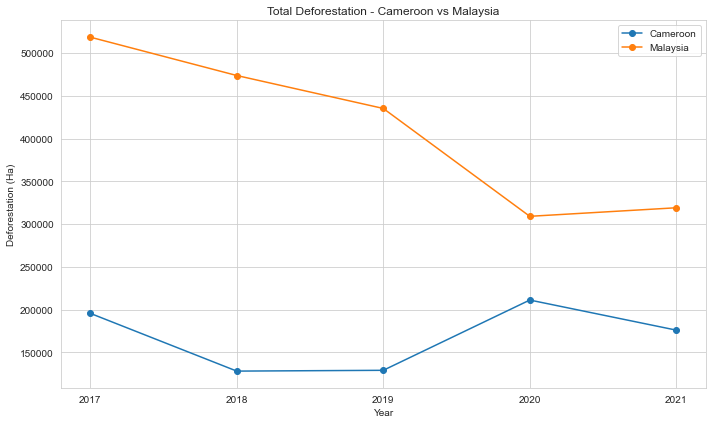

In [50]:
import matplotlib.pyplot as plt

# Data for Cameroon
cameroon_data = {
    'Year': ['2017', '2018', '2019', '2020', '2021'],
    'Deforestation': [195613.58, 128057.93, 128985.84, 211156.91, 175958.69]
}

# Data for Malaysia
malaysia_data = {
    'Year': ['2017', '2018', '2019', '2020', '2021'],
    'Deforestation': [518587.62, 473719.12, 435202.58, 309066.80, 319060.73]
}

# Plotting the line chart
plt.figure(figsize=(10, 6))

plt.plot(cameroon_data['Year'], cameroon_data['Deforestation'], marker='o', label='Cameroon')
plt.plot(malaysia_data['Year'], malaysia_data['Deforestation'], marker='o', label='Malaysia')

# Customize the chart appearance and labels
plt.title('Total Deforestation - Cameroon vs Malaysia')
plt.xlabel('Year')
plt.ylabel('Deforestation (Ha)')
plt.legend()

plt.tight_layout()
plt.savefig("cameroon_malaysia_change_total_deforestation.png", dpi=300) 
plt.show()
